In [1]:
import pandas as pd
from matplotlib import pyplot as plt

countries = ['AT', 'BE', 'CZ', 'DE_LU', 'FR', 'HR', 'HU', 'NL', 'PL', 'RO', 'SI', 'SK']
non_fbmc_countries = ['CH', 'GB', 'ES', 'IT_NORD']

In [2]:
start_date = pd.Timestamp('20230201')
end_date = pd.Timestamp('20230330')

df_observed = pd.read_excel("./data/day_ahead_prices.xlsx", index_col=0)
df_observed_non_fbmc = pd.read_excel("./data/day_ahead_prices_non_fbmc.xlsx", index_col=0)

df_observed = df_observed.loc[(df_observed.index > start_date) & (df_observed.index <= end_date)]
df_observed_non_fbmc = df_observed_non_fbmc.loc[(df_observed_non_fbmc.index > start_date) & (df_observed_non_fbmc.index <= end_date)]

df_forecasts = []
ewa_coeffs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

df_forecasts.append(pd.read_excel("price_forecast_ewa10.xlsx"))
df_forecasts.append(pd.read_excel("price_forecast_ewa20.xlsx"))
df_forecasts.append(pd.read_excel("price_forecast_ewa30.xlsx"))
df_forecasts.append(pd.read_excel("price_forecast_ewa40.xlsx"))
df_forecasts.append(pd.read_excel("price_forecast_ewa50.xlsx"))
df_forecasts.append(pd.read_excel("price_forecast_ewa60.xlsx"))
df_forecasts.append(pd.read_excel("price_forecast_ewa70.xlsx"))
df_forecasts.append(pd.read_excel("price_forecast_ewa80.xlsx"))
df_forecasts.append(pd.read_excel("price_forecast_ewa90.xlsx"))
df_forecasts.append(pd.read_excel("price_forecast_ewa100.xlsx"))

for index, df in enumerate(df_forecasts):
    df_forecasts[index].index = df_observed.index

20.444307496966495


Text(0.5, 0, 'EWA coefficient [-]')

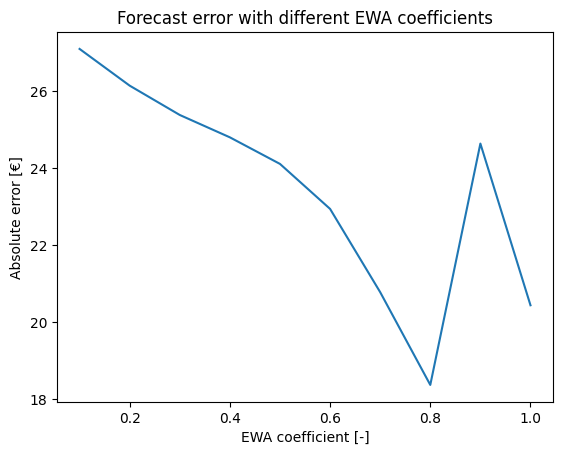

In [3]:
# Calculating errors
errors = []

for index, df in enumerate(df_forecasts):
    df_errors = df.copy()
    df_errors = df_errors - df_observed
    errors.append(abs(df_errors.abs().mean().mean()))
    
df_errors = (0.5 * (df_forecasts[9] + df_forecasts[9])).copy()
df_errors = df_errors - df_observed
print(abs(df_errors.abs().mean().mean()))
    
plt.plot(ewa_coeffs, errors)
plt.title('Forecast error with different EWA coefficients')
plt.ylabel('Absolute error [€]')
plt.xlabel('EWA coefficient [-]')

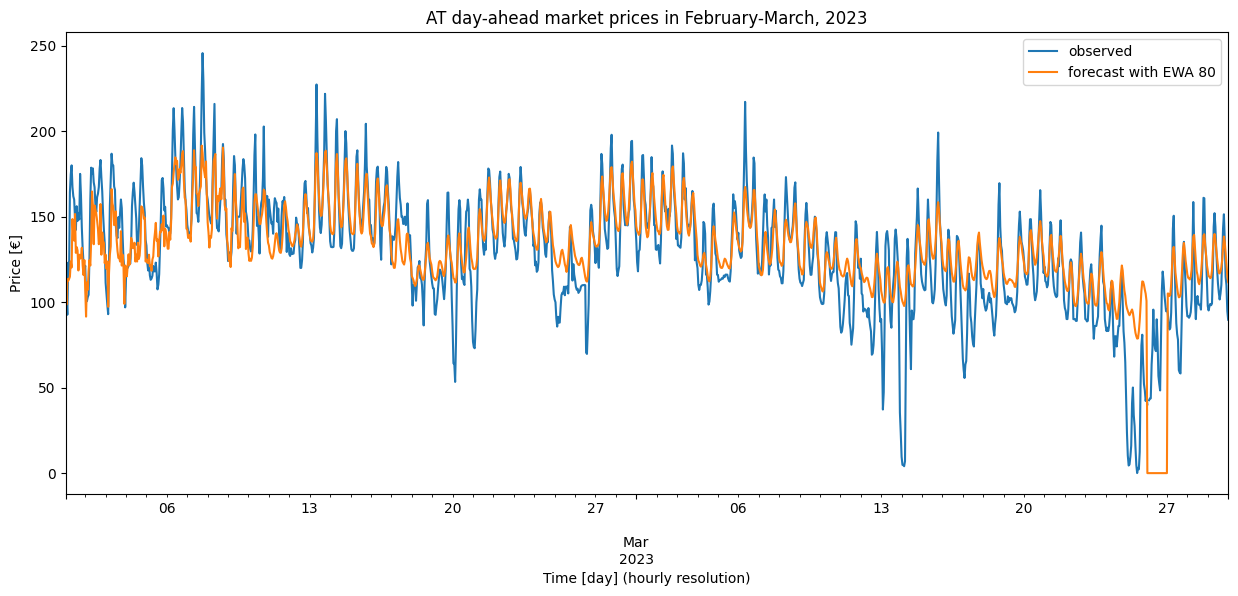

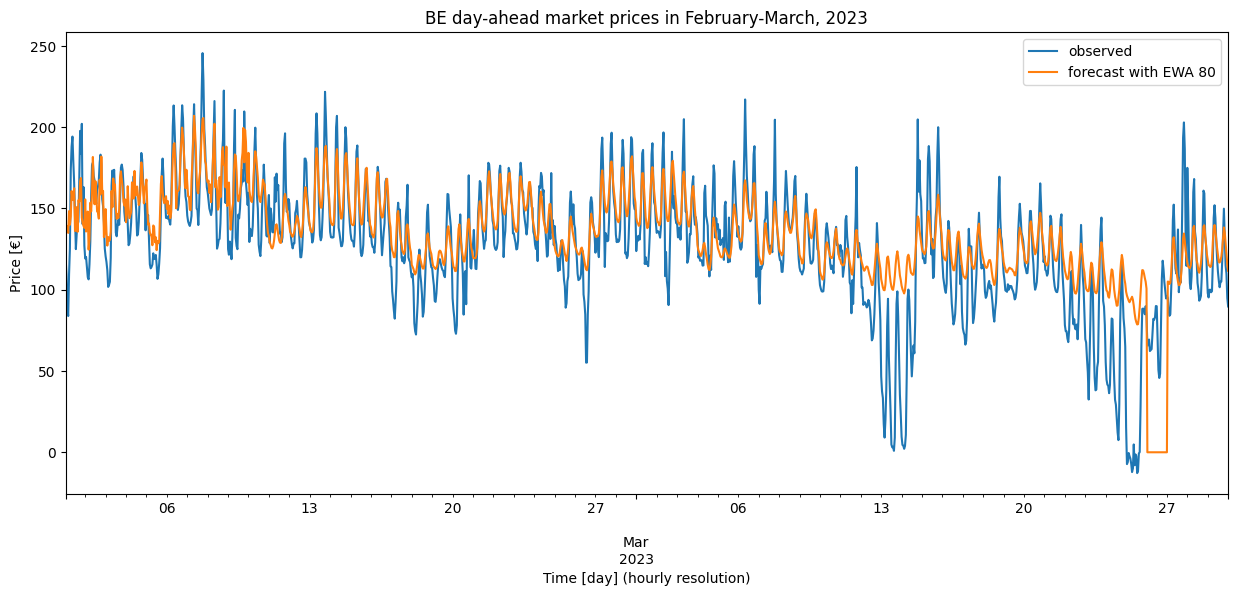

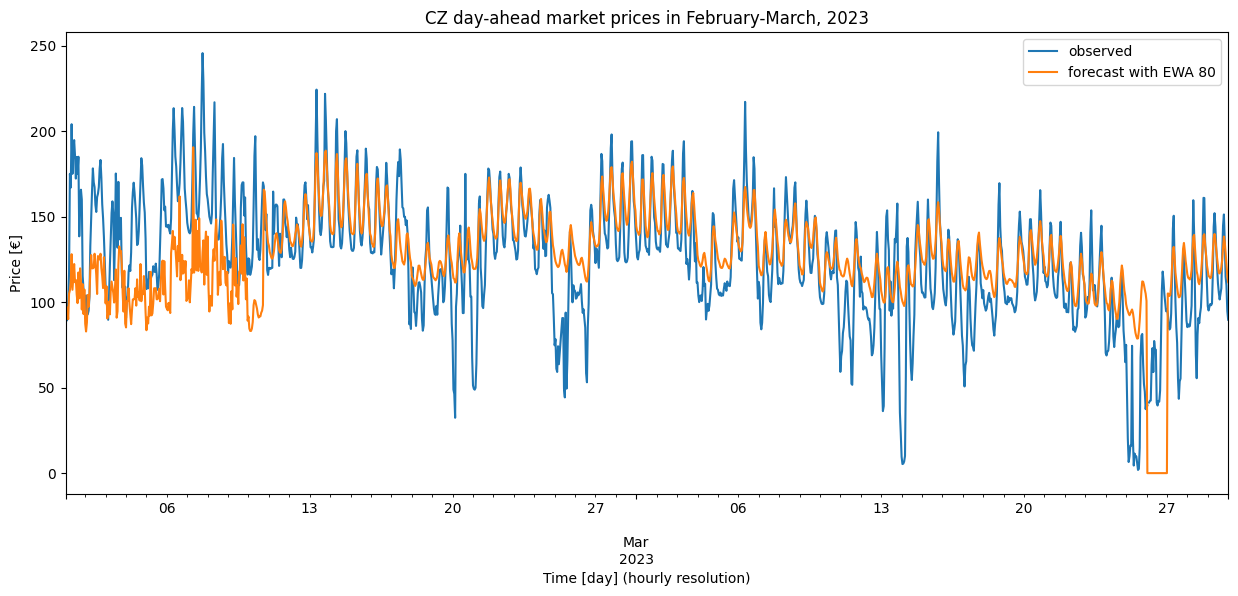

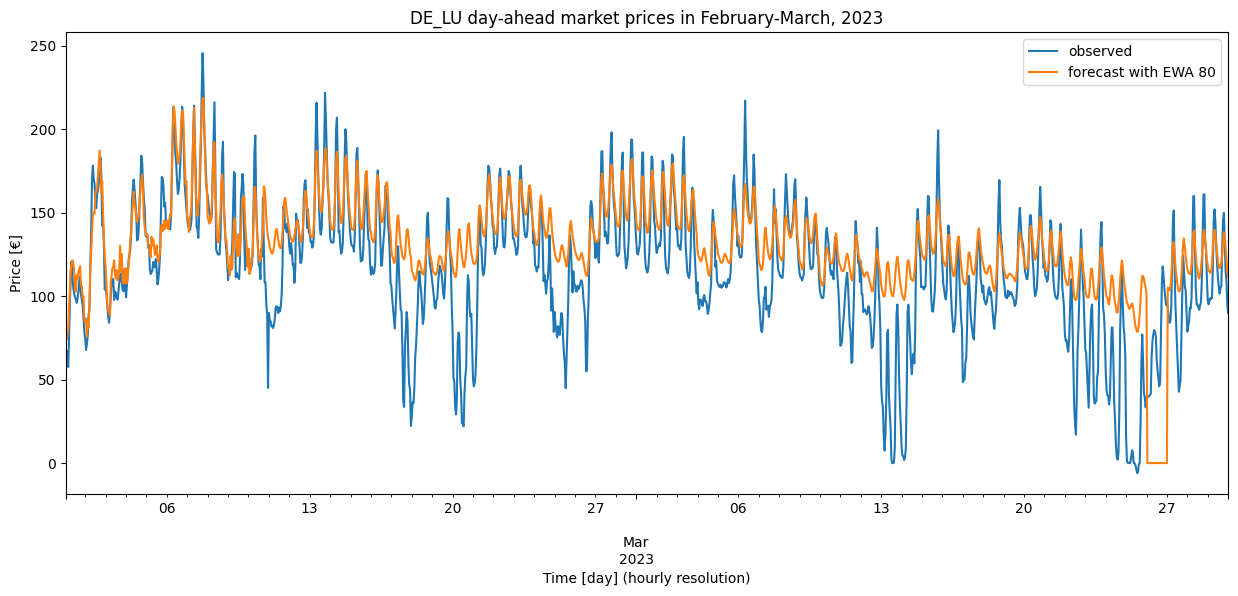

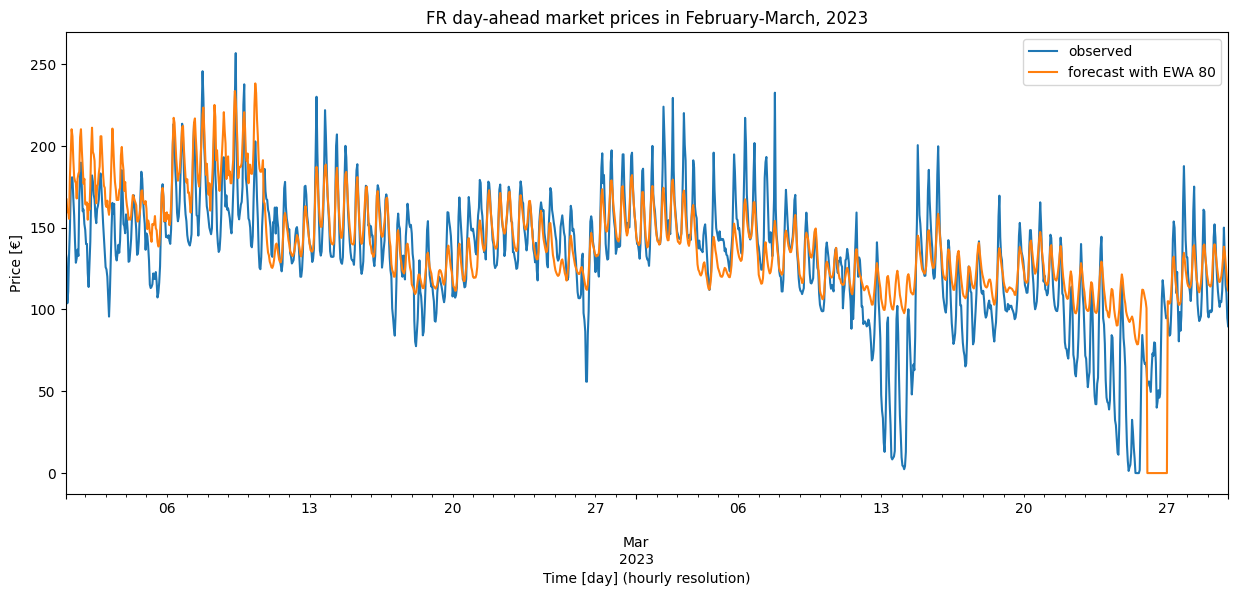

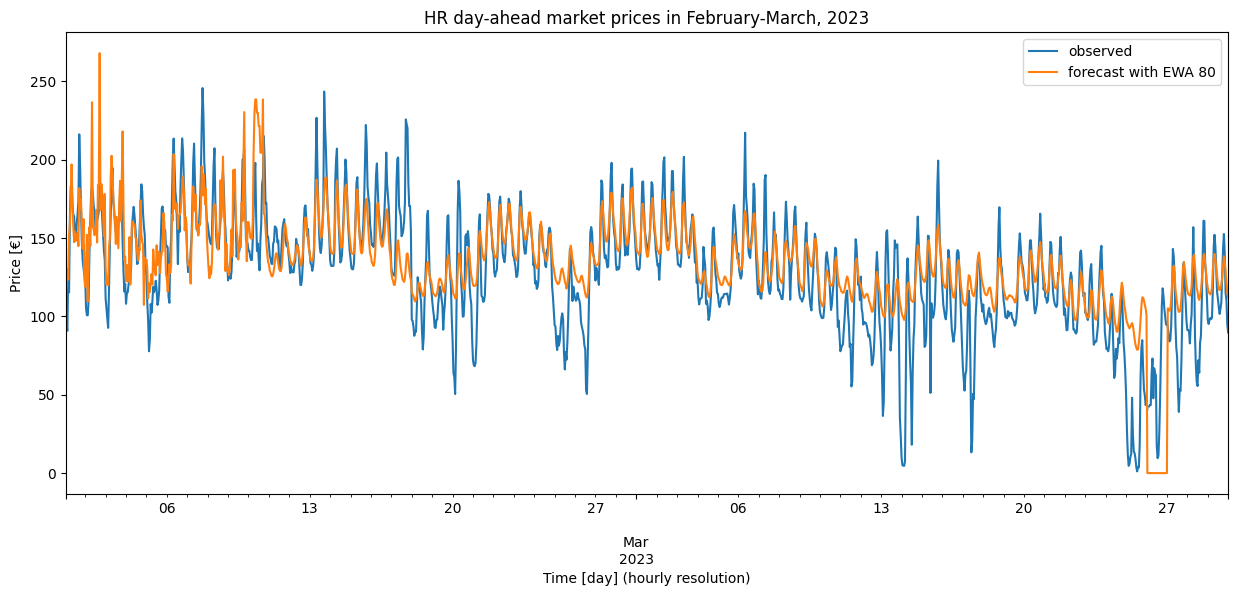

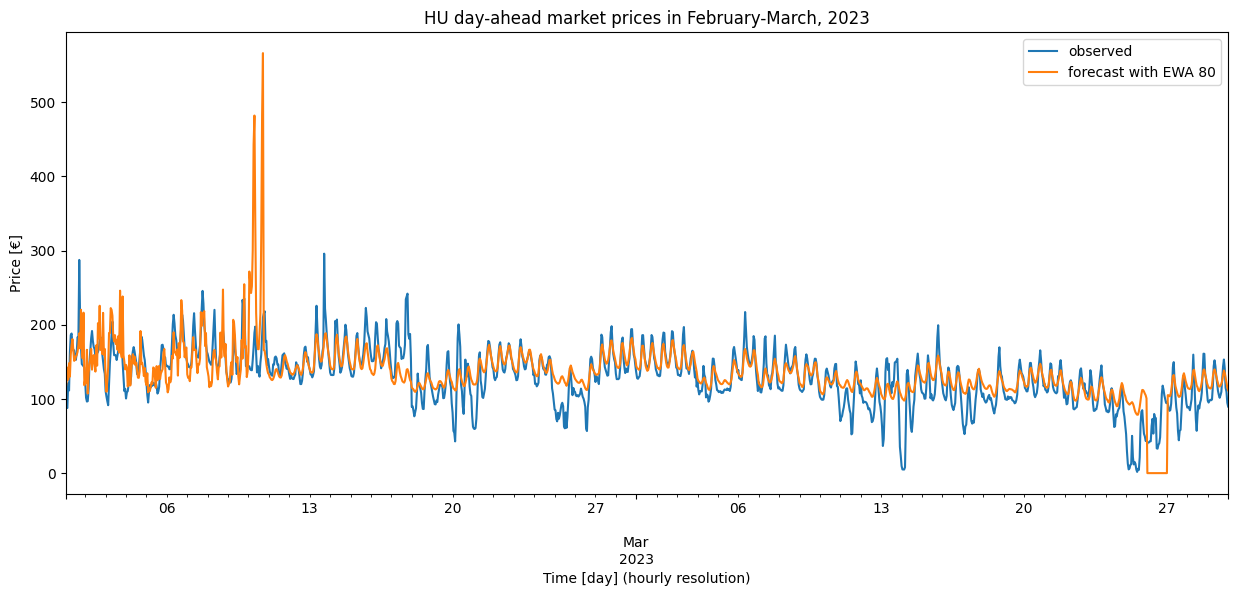

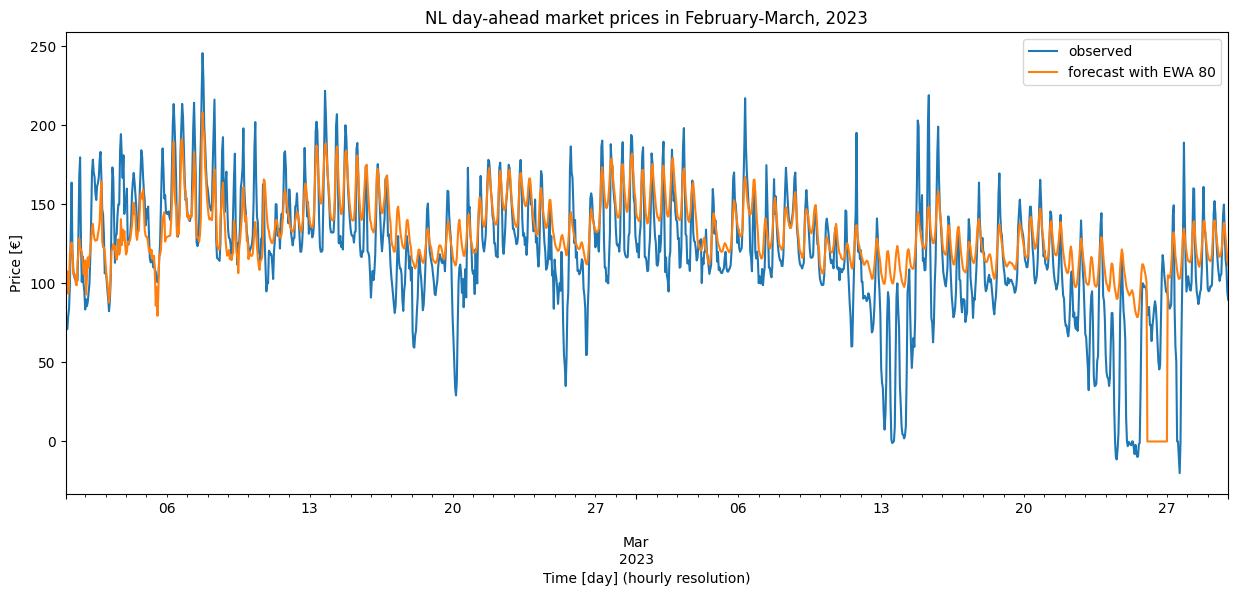

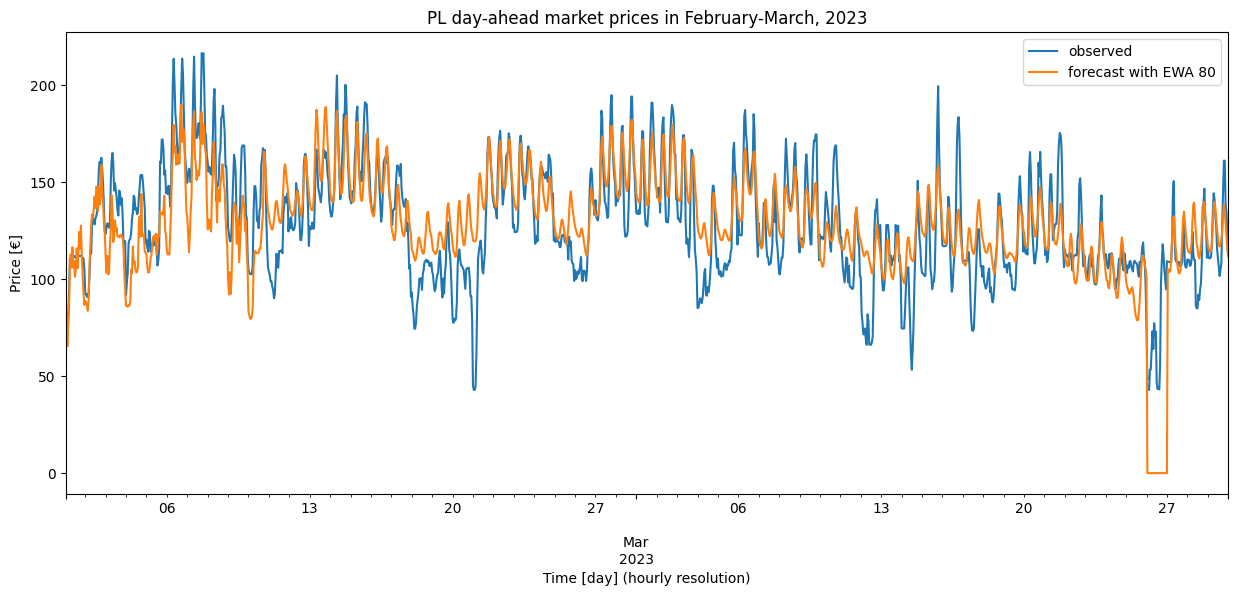

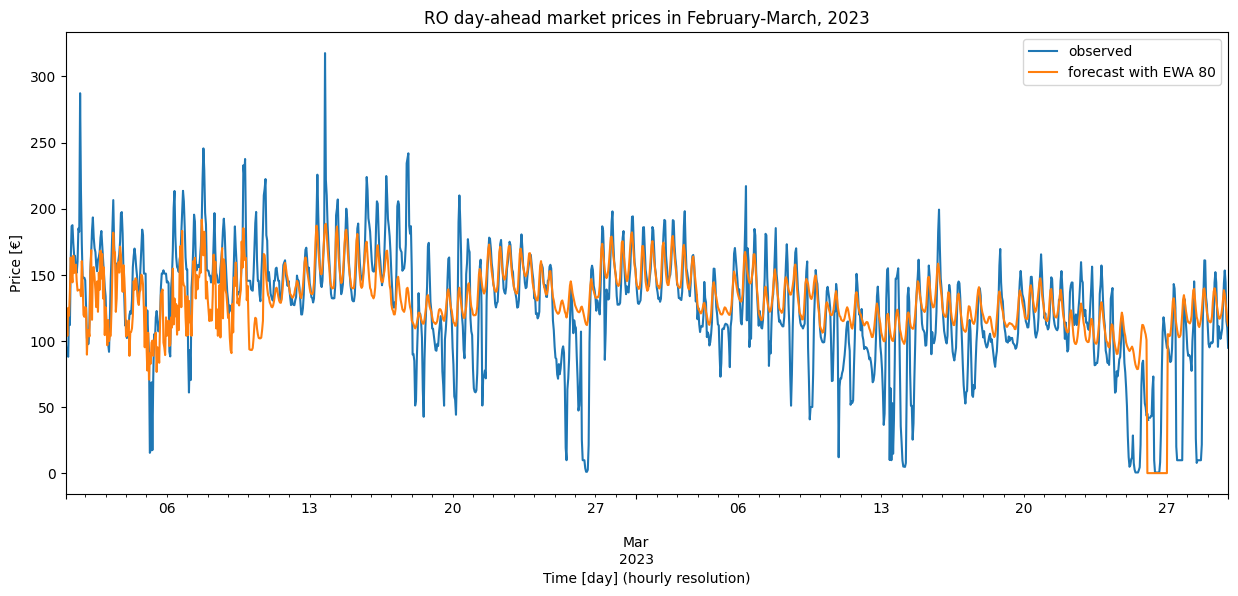

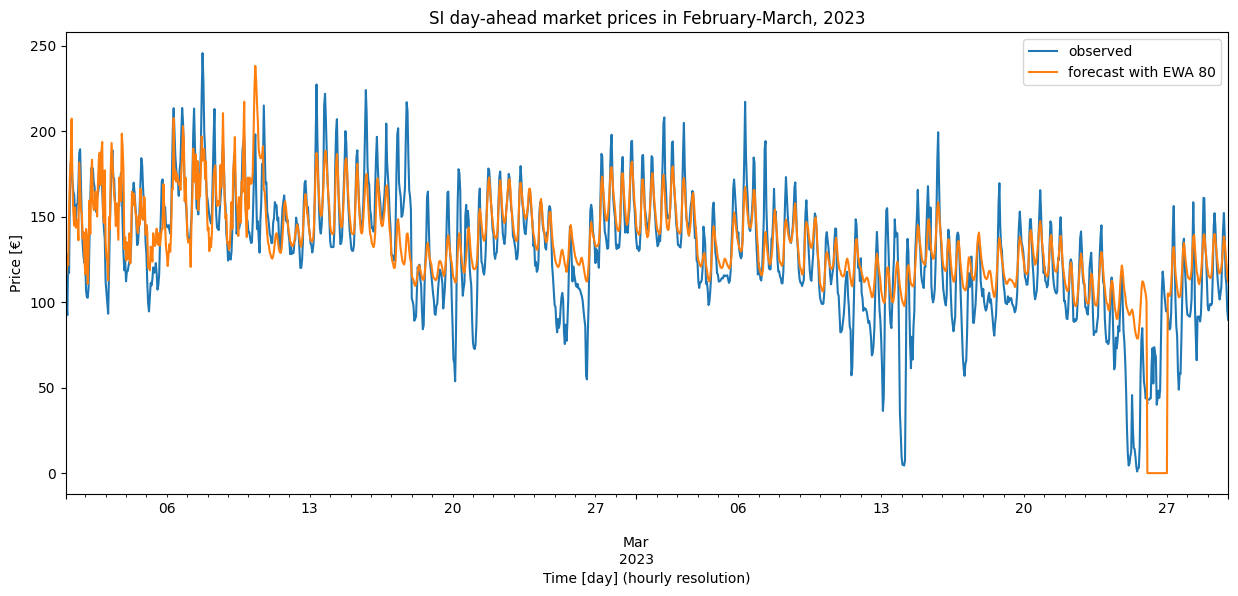

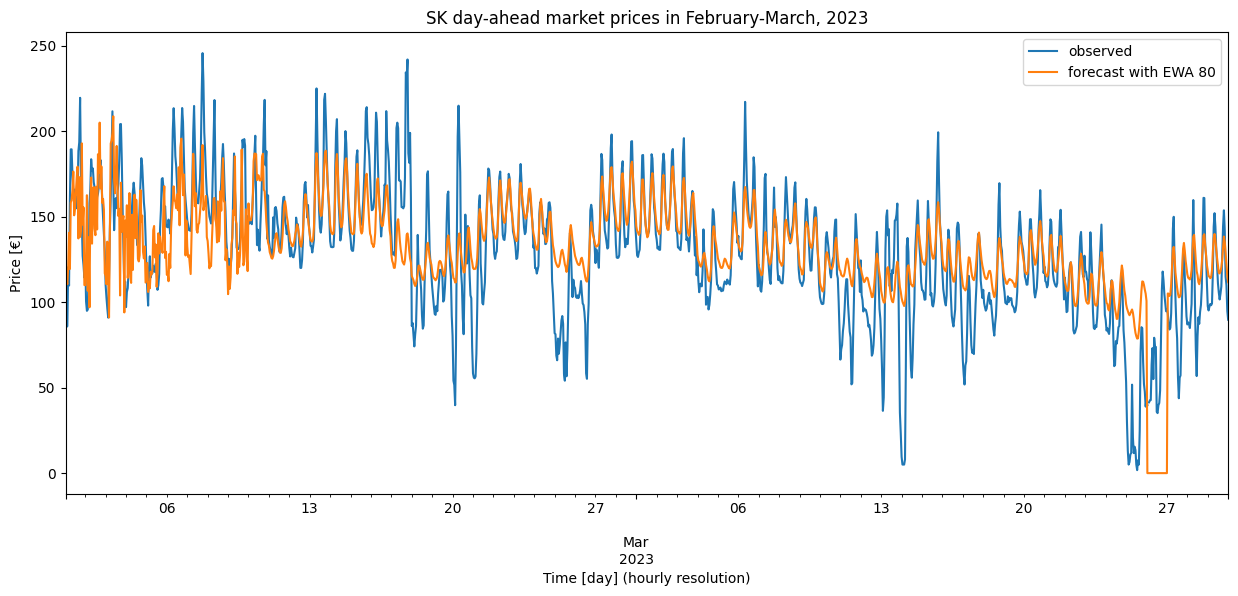

In [4]:
for zone in countries:
    plt.figure(figsize=(15,6))
    ax = df_observed[zone].plot()
    #df_forecasts[7][zone].plot(ax=ax)
    #df_forecasts[9][zone].plot(ax=ax)
    ((df_forecasts[7][zone] + df_forecasts[9][zone]) * 0.5).plot(ax=ax)
    plt.title("{0} day-ahead market prices in February-March, 2023".format(zone))
    plt.ylabel('Price [€]')
    plt.xlabel('Time [day] (hourly resolution)')
    ax.legend([
        'observed', 
        'forecast with EWA 80',
        'forecast with mean average',
    ])
    plt.show()

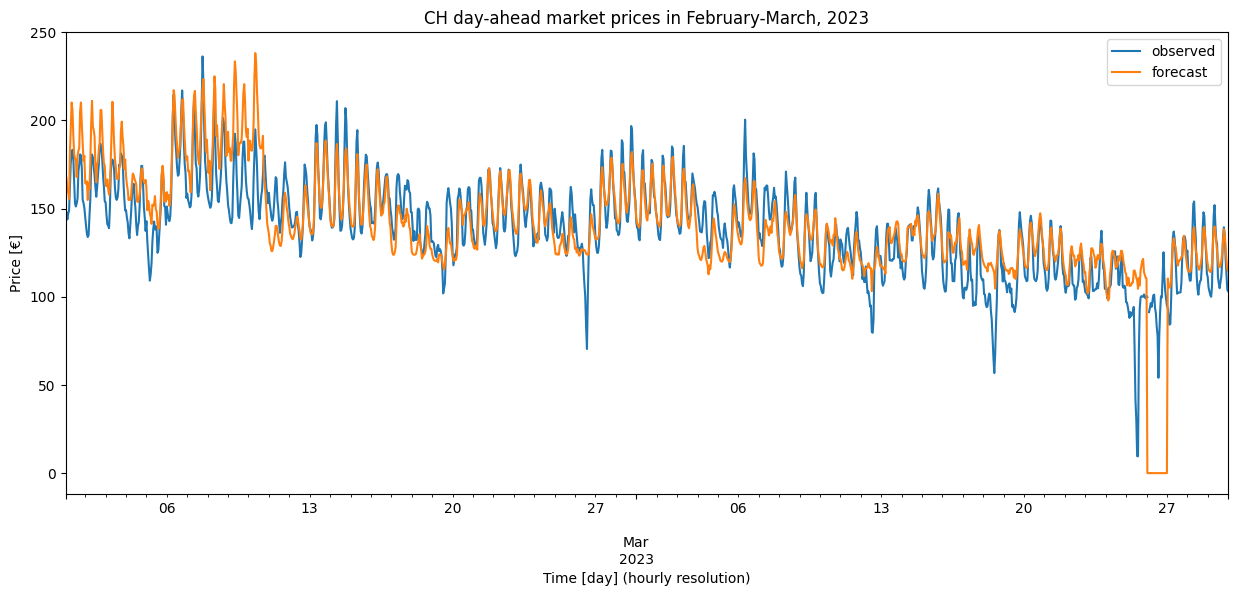

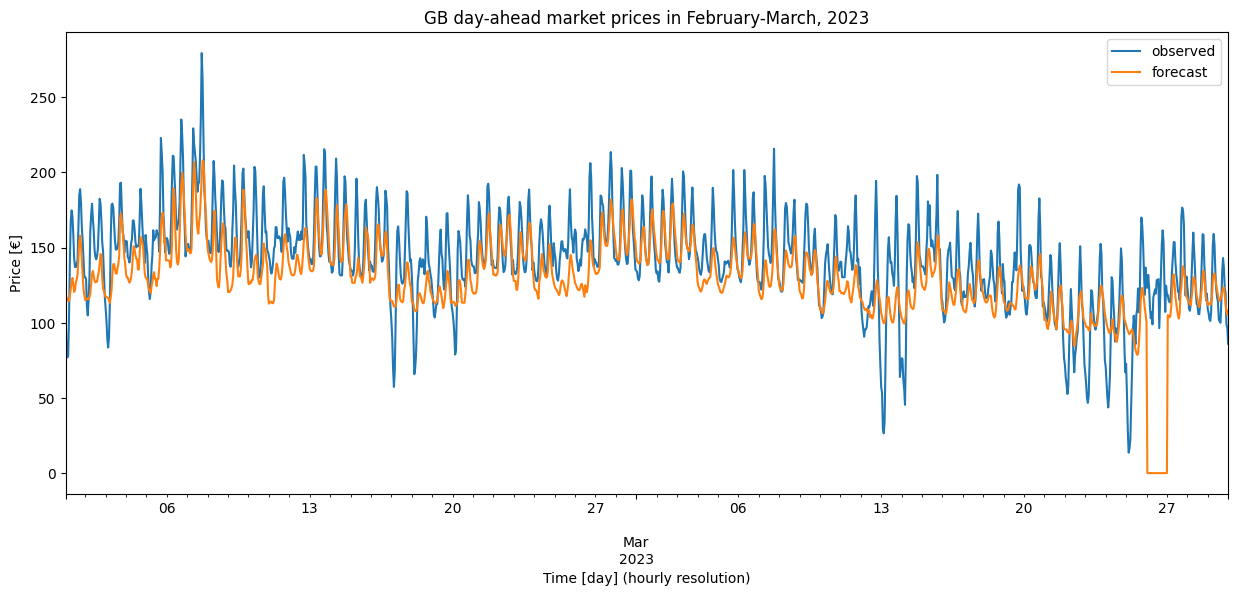

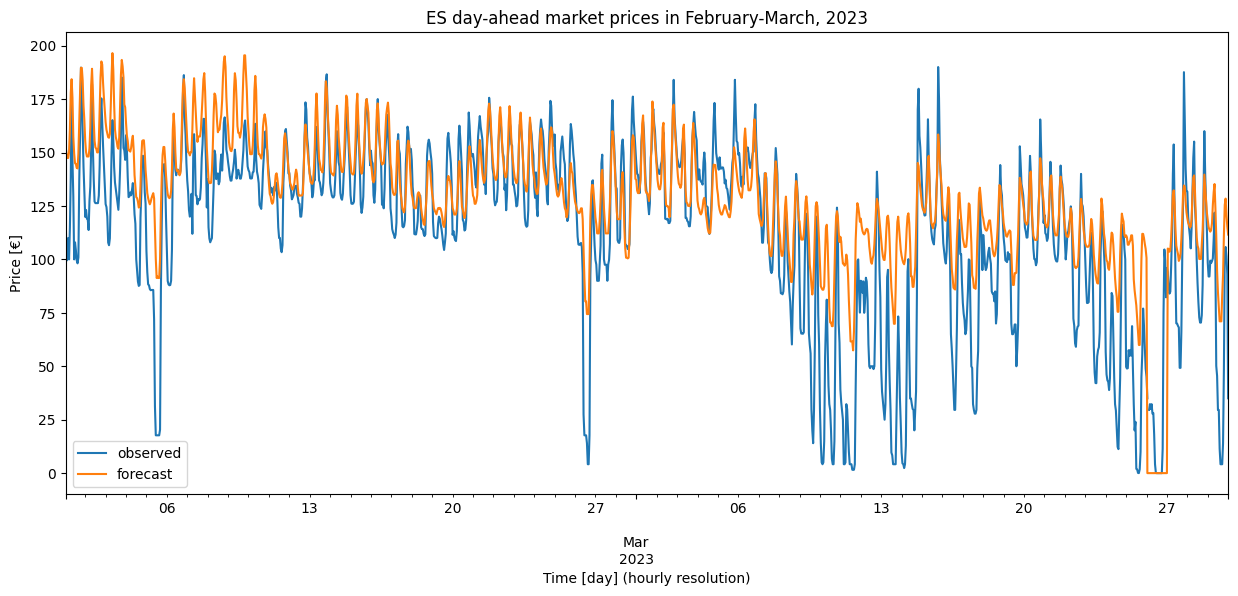

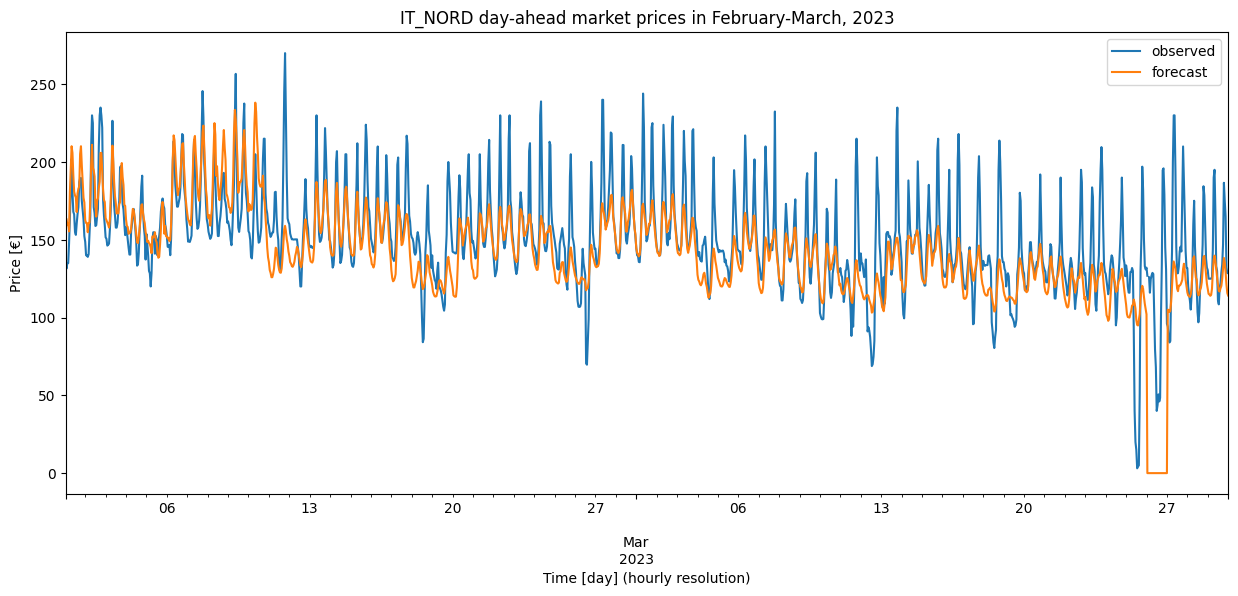

In [5]:
for zone in non_fbmc_countries:
    plt.figure(figsize=(15,6))
    ax = df_observed_non_fbmc[zone].plot()
    #df_forecasts[7][zone].plot(ax=ax)
    #df_forecasts[9][zone].plot(ax=ax)
    ((df_forecasts[7][zone] + df_forecasts[9][zone]) * 0.5).plot(ax=ax)
    plt.title("{0} day-ahead market prices in February-March, 2023".format(zone))
    plt.ylabel('Price [€]')
    plt.xlabel('Time [day] (hourly resolution)')
    ax.legend([
        'observed', 
        'forecast',
    ])
    plt.show()

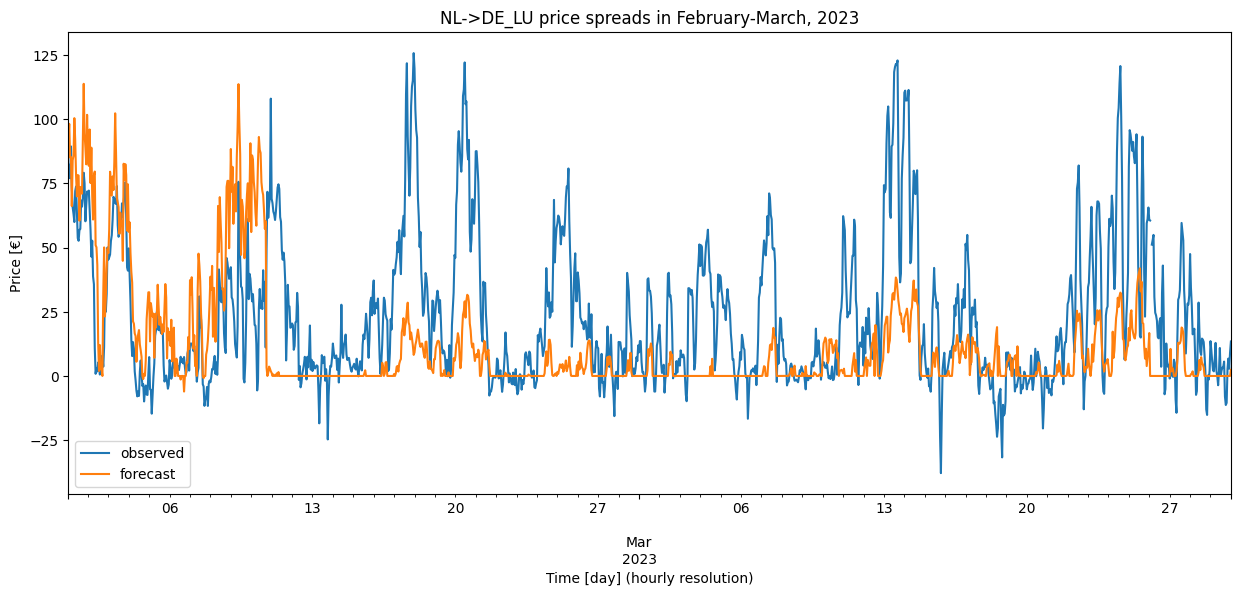

In [9]:
# NL-> DE
df_nl_be_observed = df_observed_non_fbmc['CH'] - df_observed['DE_LU'] 
df_nl_be_forecast = df_forecasts[9]['CH'] - df_forecasts[9]['DE_LU'] 
plt.figure(figsize=(15,6))
ax = df_nl_be_observed.plot()
df_nl_be_forecast.plot(ax=ax)
plt.title("NL->DE_LU price spreads in February-March, 2023")
plt.ylabel('Price [€]')
plt.xlabel('Time [day] (hourly resolution)')
ax.legend(['observed', 'forecast'])
plt.show()